# Tensorflow 实现线性回归模型

[0.7189734] [0.11216611]
[1.8371531] [0.71936446]
[1.783387] [1.0794488]
[1.7384293] [1.3805403]
[1.7008371] [1.6323032]
[1.6694038] [1.8428195]
[1.6431202] [2.018847]
[1.6211427] [2.1660352]
[1.6027657] [2.2891097]
[1.5873995] [2.3920212]
[1.5745505] [2.4780731]
[1.5638069] [2.5500255]
[1.5548234] [2.6101909]
[1.5473115] [2.6604996]
[1.5410303] [2.702566]
[1.5357782] [2.7377405]
[1.5313866] [2.7671523]
[1.5277141] [2.7917469]
[1.5246438] [2.81231]
[1.5220762] [2.8295052]
[array([1.5199493], dtype=float32), array([2.8437502], dtype=float32)]


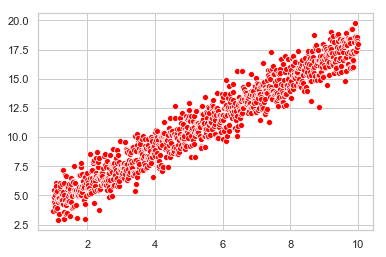

In [53]:


import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x_data = np.linspace(1,10,1000);
y_data = x_data * 1.5 + np.random.randn(1000)+3;
sns.set(style = "whitegrid");
sns.scatterplot(x = x_data,y = y_data, color = "red");

# 初始化简单线性回归模型参数w,b
w = tf.Variable([.0])
b = tf.Variable([.0])

# 定义线性回归模型的输入
x = tf.placeholder(tf.float32);

# 定义线性回归模型的表达式
linear_model = w * x + b;

# 定义线性模型的输出
y = tf.placeholder(tf.float32);

# 定义模型的损失函数 MSE
loss = tf.reduce_mean(tf.square(linear_model - y));

# 使用随机梯度下降法优化函数，设置下降的步长为0.01，最小化模型损失值的和
train = tf.train.GradientDescentOptimizer(0.005).minimize(loss);

#初始化变量
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer());
    for i in range(2000):
        sess.run(train,feed_dict = {x : x_data, y : y_data});
        if i%100 == 0:
            print(sess.run(w), sess.run(b))
    print(sess.run([w,b]));
#sns.lineplot(x = x_data, y = result.eval(), color = "green")

# 多特征线性回归

In [101]:
from sklearn import datasets
boston = datasets.load_boston()

In [102]:
X = boston.data
y = boston.target

In [103]:
X.shape

(506, 13)

In [104]:
y.shape

(506,)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 666)

In [107]:
SD = StandardScaler();
SD.fit(X_train);
X_train = SD.transform(X_train);
X_test = SD.transform(X_test);
print(X_train.shape)

(354, 13)


In [108]:
X = tf.placeholder(tf.float32,[354,13]);
w = tf.Variable(tf.ones([13,1]));
b = tf.Variable(tf.zeros([1]));
linear_model = tf.matmul(X,w) + b;
Y = tf.placeholder(tf.float32,[354]);

# 定义模型的损失函数 MSE
loss = tf.reduce_mean(tf.square(linear_model - y));

# 使用随机梯度下降法优化函数，设置下降的步长为0.01，最小化模型损失值的和
train = tf.train.GradientDescentOptimizer(0.005).minimize(loss);

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer());
    for i in range(2000):
        sess.run(train,feed_dict= {X : X_train, Y: y_train});
        if i%100 == 0:
            print(sess.run([w,b]));
    print(sess.run([w,b]));

from sklearn.linear_model import LinearRegression

LR = LinearRegression();
LR.fit(X_train,y_train);
print(LR.coef_,LR.intercept_)
LR.score(X_test,y_test)

[array([[0.97209513],
       [1.0119017 ],
       [0.9686647 ],
       [0.9915004 ],
       [0.9699297 ],
       [1.0081676 ],
       [0.9724893 ],
       [1.0227872 ],
       [0.96368295],
       [0.9630714 ],
       [0.9796494 ],
       [1.0125198 ],
       [0.9740412 ]], dtype=float32), array([0.22532807], dtype=float32)]
[array([[0.267965  ],
       [0.64115447],
       [0.4079689 ],
       [0.40041056],
       [0.47212216],
       [0.7664334 ],
       [0.466136  ],
       [1.059621  ],
       [0.05405208],
       [0.07146993],
       [0.4816996 ],
       [0.7861877 ],
       [0.5275464 ]], dtype=float32), array([14.367546], dtype=float32)]
[array([[ 0.14470054],
       [ 0.31426728],
       [ 0.32554352],
       [ 0.16045788],
       [ 0.4155185 ],
       [ 0.541388  ],
       [ 0.33851928],
       [ 0.82371074],
       [-0.08503103],
       [-0.06924874],
       [ 0.3332285 ],
       [ 0.45516658],
       [ 0.41497818]], dtype=float32), array([19.544056], dtype=float32)]
[array([

0.6590432219584867